In [1]:
# Third-party
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
plt.style.use('apw-notebook')
%matplotlib inline
import h5py

from gwb.data import TGASData

In [2]:
with h5py.File("../data/23560/snr8_r10_dv10_vscatter0-lratio.h5") as f:
    ln_L1 = f['lnH1'][:]
    ln_L2 = f['lnH2'][:]

In [3]:
tbl = fits.getdata("../data/23560/snr8_r10_dv10.fits", 1)

In [4]:
tbl.dtype.names

('star1', 'star2', 'delta_v', 'sep')

In [23]:
v_cuts = [(0,2), (4,6), (8,10)]
llr_cuts = [(1.75,2.25), (4.75,5.25), (5.75,6.25)]
colors = ['#fcae91', '#bae4b3', '#bdd7e7']
style = dict(linestyle='none', marker='.', alpha=0.5)

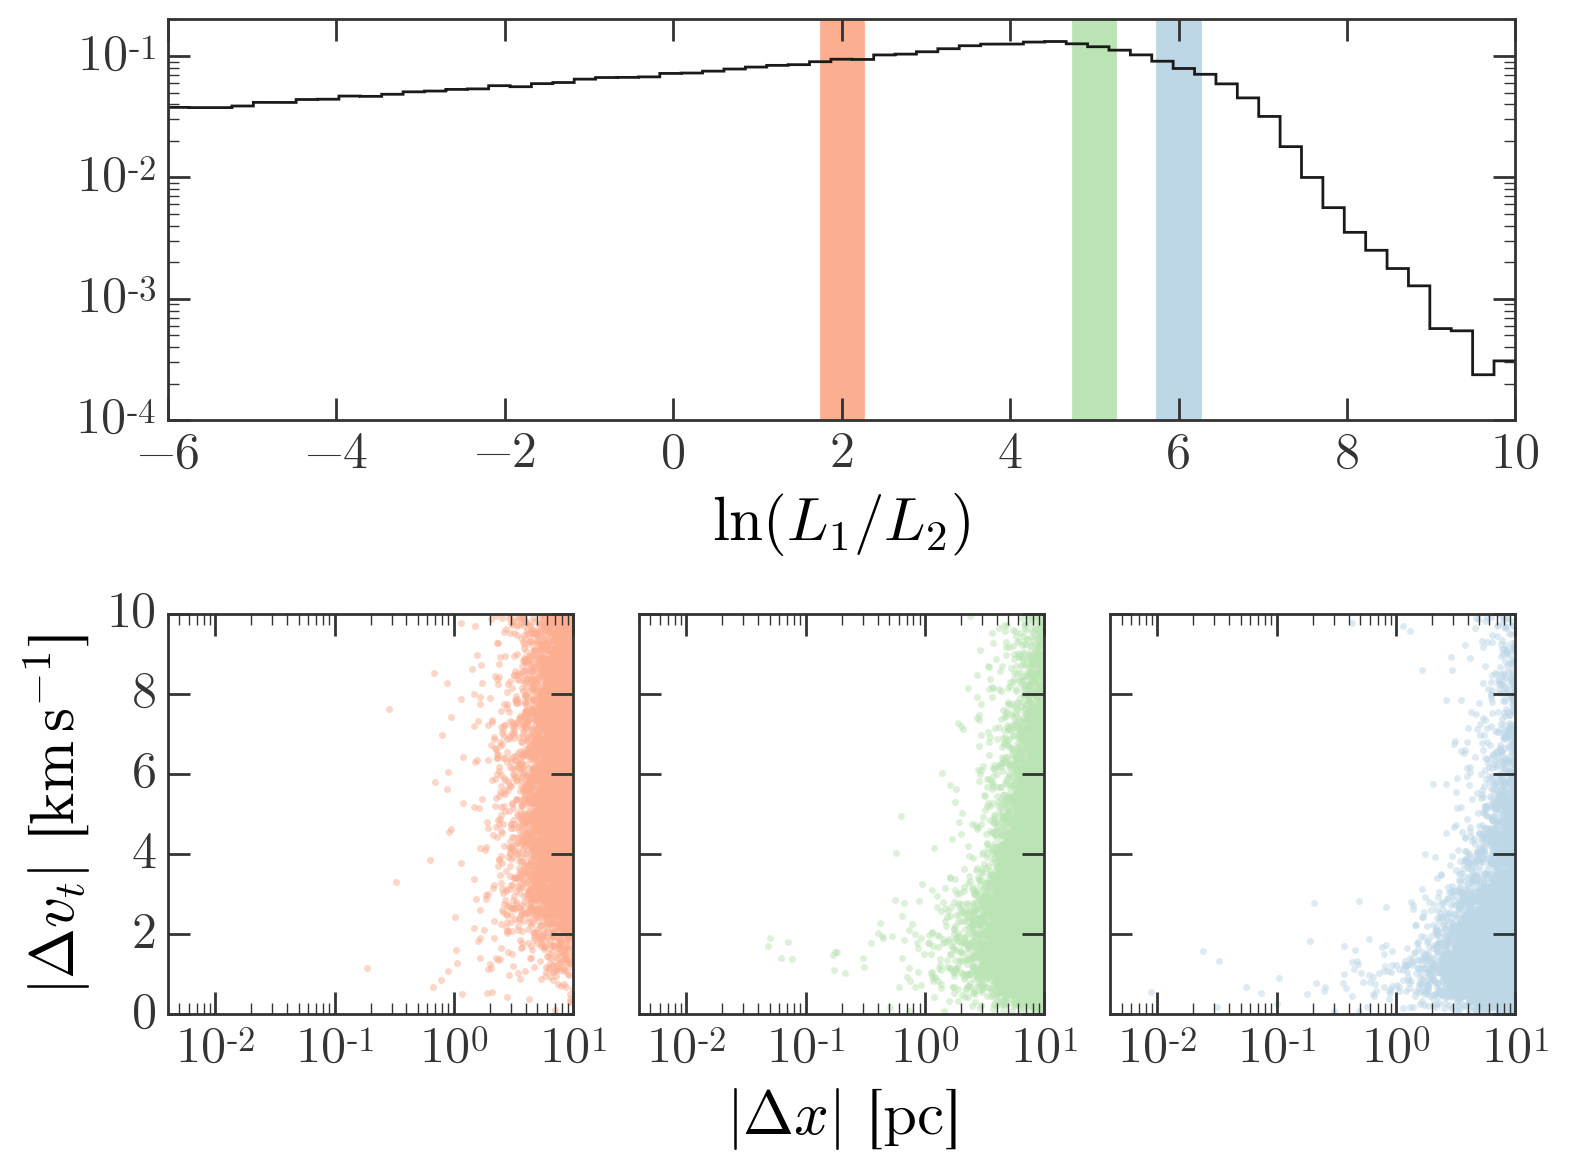

In [12]:
gs = GridSpec(2,3)

fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(gs[0,:])
ax1.hist(ln_L1 - ln_L2, bins=np.linspace(-6, 10, 64), histtype='step', normed=True);

for i,(l,r) in enumerate(llr_cuts):
    ax1.fill_betweenx([0,1.], l, r, color=colors[i])

ax1.set_yscale('log')
ax1.set_xlim(-6,10)
ax1.set_ylim(1E-4,2E-1)
ax1.set_xlabel(r"$\ln(L_1/L_2)$")

for i in range(3):
    ax = fig.add_subplot(gs[1,i])
    idx = ((ln_L1 - ln_L2) > llr_cuts[i][0]) & ((ln_L1 - ln_L2) < llr_cuts[i][1])

    ax.plot(tbl['sep'][idx], tbl['delta_v'][idx], color=colors[i], **style)
    ax.set_xlim(4E-3, 1E1)
    ax.set_ylim(0,10)
    ax.set_xscale('log')
    
    if i > 0:
        ax.set_yticklabels([])
    
    if i == 0:
        ax.set_ylabel(r'$|\Delta v_t|$ [${\rm km}\,{\rm s}^{-1}$]')
        
    if i == 1:
        ax.set_xlabel(r'$|\Delta x|$ [pc]')
        
fig.tight_layout()

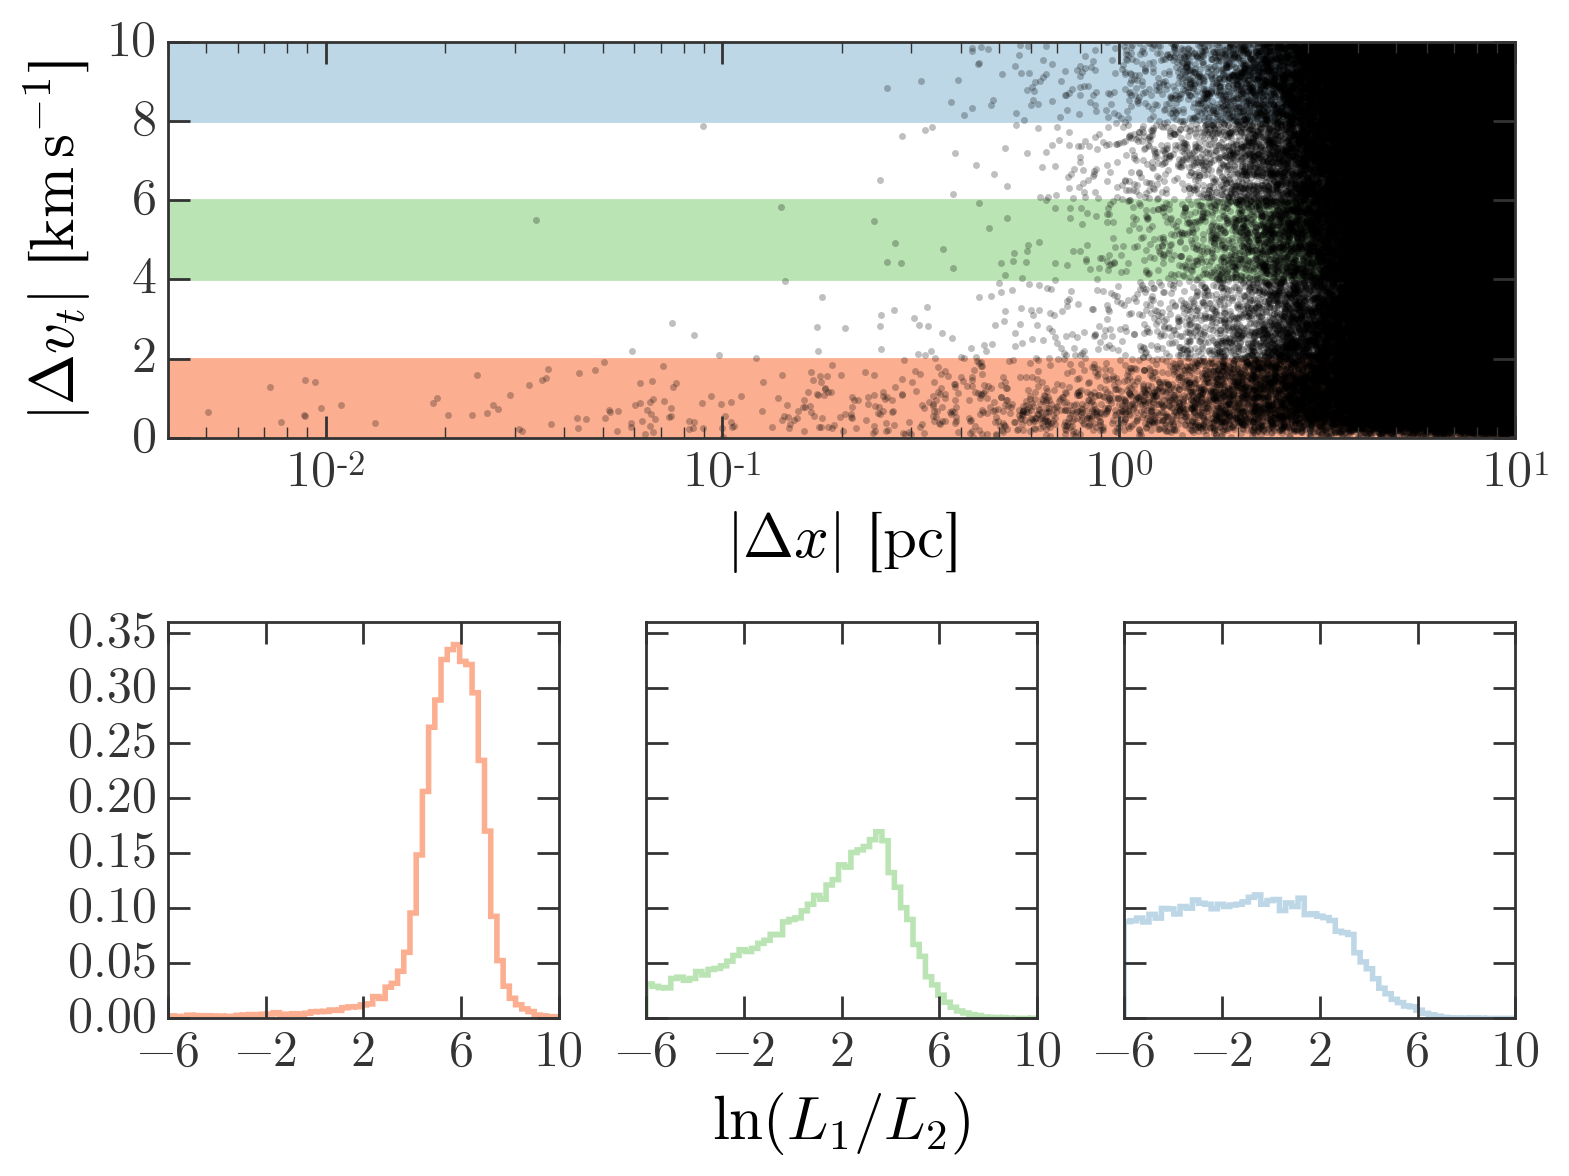

In [37]:
style2 = dict(linestyle='none', marker='.', alpha=0.25)

gs = GridSpec(2,3)

fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(gs[0,:])
ax1.plot(tbl['sep'], tbl['delta_v'], color='k', **style2)

for i,(l,r) in enumerate(v_cuts):
    ax1.fill_between([0,10.], l, r, color=colors[i])

ax1.set_xscale('log')
ax1.set_xlim(4E-3, 1E1)
ax1.set_ylim(0,10)
ax1.set_xlabel(r'$|\Delta x|$ [pc]')
ax1.set_ylabel(r'$|\Delta v_t|$ [${\rm km}\,{\rm s}^{-1}$]')

for i in range(3):
    ax = fig.add_subplot(gs[1,i])
    idx = (tbl['delta_v'] > v_cuts[i][0]) & (tbl['delta_v'] < v_cuts[i][1])

    ax.hist((ln_L1 - ln_L2)[idx], bins=np.linspace(-6, 10, 64), 
            histtype='step', normed=True, color=colors[i], linewidth=2);
    ax.set_xlim(-6,10)
    ax.set_ylim(0,0.36)
#     ax.set_ylim(1E-4,1E0)
#     ax.set_yscale('log')
    
    if i > 0:
        ax.set_yticklabels([])
        
    if i == 1:
        ax.set_xlabel(r"$\ln(L_1/L_2)$")
        
    ax.xaxis.set_ticks(range(-6,10+1,4))
        
fig.tight_layout()

---

In [58]:
v_cuts = [(0,2), (2,6), (6,10)]
llr_cuts = [(-6, 2), (2,6), (6,10)]

v_colors = ['#74add1', '#abd9e9', '#e0f3f8']
llr_colors = ['#f46d43', '#fdae61', '#fee090']

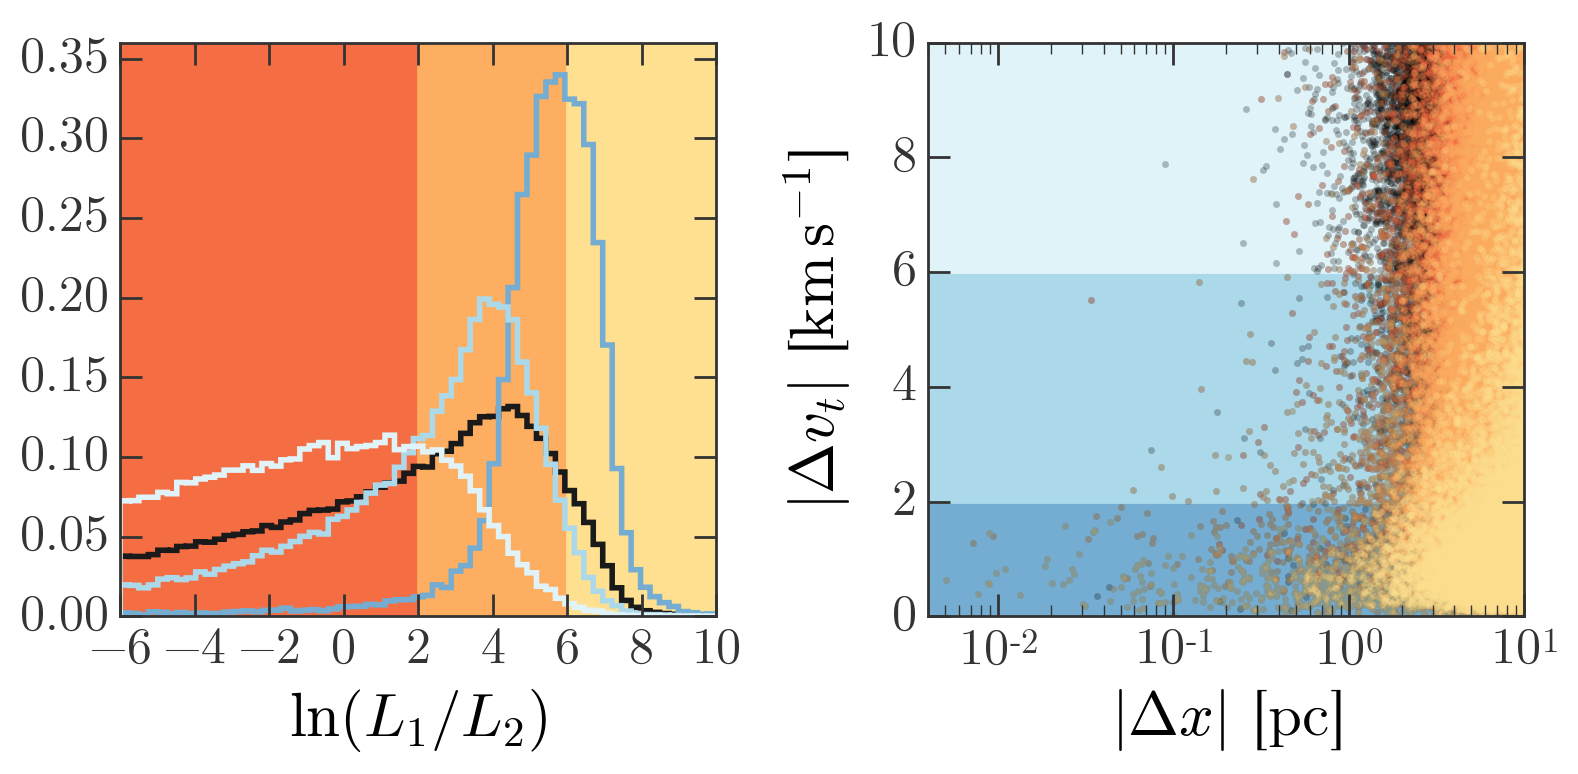

In [59]:
fig,axes = plt.subplots(1,2,figsize=(8,4))

axes[0].hist(ln_L1 - ln_L2, bins=np.linspace(-6, 10, 64), histtype='step', normed=True, linewidth=2);
axes[1].plot(tbl['sep'], tbl['delta_v'], color='k', linestyle='none', marker='.', alpha=0.25, zorder=-10)

axes[0].set_xlim(-6,10)
axes[0].set_ylim(0, 0.36)

axes[1].set_xlim(4E-3, 1E1)
axes[1].set_ylim(0, 10)
axes[1].set_xscale('log')

for i,(l,r) in enumerate(llr_cuts):
    axes[0].fill_betweenx([0,1.], l, r, color=llr_colors[i], zorder=-100)

for i,(l,r) in enumerate(v_cuts):
    axes[1].fill_between([0,10.], l, r, color=v_colors[i], zorder=-100)

for i in range(3):
    idx = (tbl['delta_v'] > v_cuts[i][0]) & (tbl['delta_v'] < v_cuts[i][1])
    axes[0].hist((ln_L1 - ln_L2)[idx], bins=np.linspace(-6, 10, 64), 
                 histtype='step', normed=True, color=v_colors[i], linewidth=2);
    
    idx = ((ln_L1 - ln_L2) > llr_cuts[i][0]) & ((ln_L1 - ln_L2) < llr_cuts[i][1])
    axes[1].plot(tbl['sep'][idx], tbl['delta_v'][idx], color=llr_colors[i], linestyle='none', marker='.', alpha=0.25)
    
axes[0].set_xlabel(r"$\ln(L_1/L_2)$")
axes[1].set_xlabel(r'$|\Delta x|$ [pc]')
axes[1].set_ylabel(r'$|\Delta v_t|$ [${\rm km}\,{\rm s}^{-1}$]')

fig.tight_layout()

---

In [62]:
v_cuts = [(0,2), (2,6), (6,10)]
llr_cuts = [(-6, 2), (2,6), (6,10)]

v_colors = ['#74add1', '#abd9e9', '#e0f3f8']
llr_colors = ['#fee090', '#fdae61', '#f46d43']

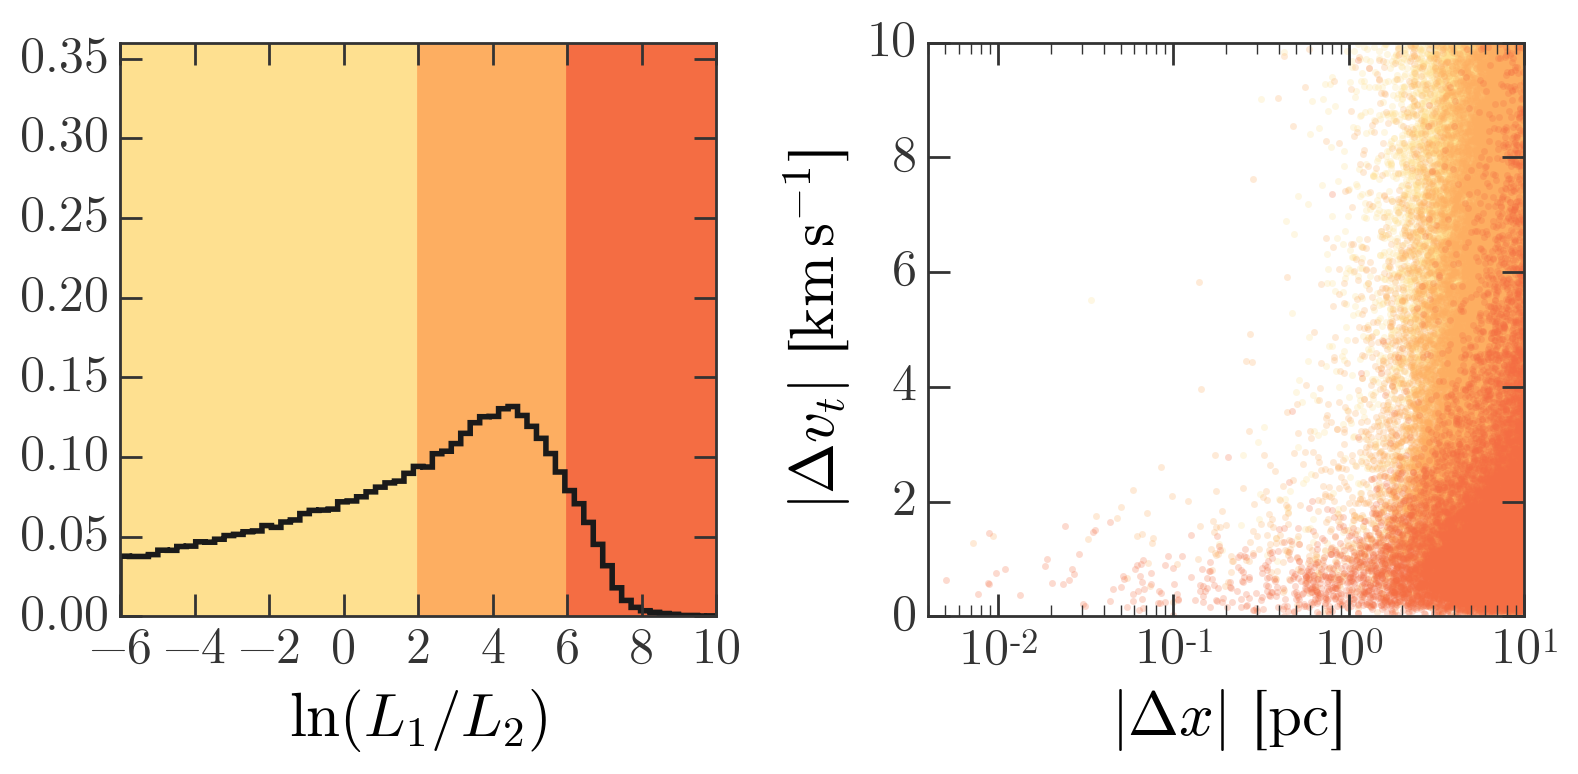

In [65]:
fig,axes = plt.subplots(1,2,figsize=(8,4))

axes[0].hist(ln_L1 - ln_L2, bins=np.linspace(-6, 10, 64), histtype='step', normed=True, linewidth=2);
# axes[1].plot(tbl['sep'], tbl['delta_v'], color='k', linestyle='none', marker='.', alpha=0.25, zorder=-10)

axes[0].set_xlim(-6,10)
axes[0].set_ylim(0, 0.36)

axes[1].set_xlim(4E-3, 1E1)
axes[1].set_ylim(0, 10)
axes[1].set_xscale('log')

for i,(l,r) in enumerate(llr_cuts):
    axes[0].fill_betweenx([0,1.], l, r, color=llr_colors[i], zorder=-100)

# for i,(l,r) in enumerate(v_cuts):
#     axes[1].fill_between([0,10.], l, r, color=v_colors[i], zorder=-100)

for i in range(3):
#     idx = (tbl['delta_v'] > v_cuts[i][0]) & (tbl['delta_v'] < v_cuts[i][1])
#     axes[0].hist((ln_L1 - ln_L2)[idx], bins=np.linspace(-6, 10, 64), 
#                  histtype='step', normed=True, color=v_colors[i], linewidth=2);
    
    idx = ((ln_L1 - ln_L2) > llr_cuts[i][0]) & ((ln_L1 - ln_L2) < llr_cuts[i][1])
    axes[1].plot(tbl['sep'][idx], tbl['delta_v'][idx], color=llr_colors[i], 
                 linestyle='none', marker='.', alpha=0.25, markeredgecolor='none', markeredgewidth=0)
    
axes[0].set_xlabel(r"$\ln(L_1/L_2)$")
axes[1].set_xlabel(r'$|\Delta x|$ [pc]')
axes[1].set_ylabel(r'$|\Delta v_t|$ [${\rm km}\,{\rm s}^{-1}$]')

fig.tight_layout()

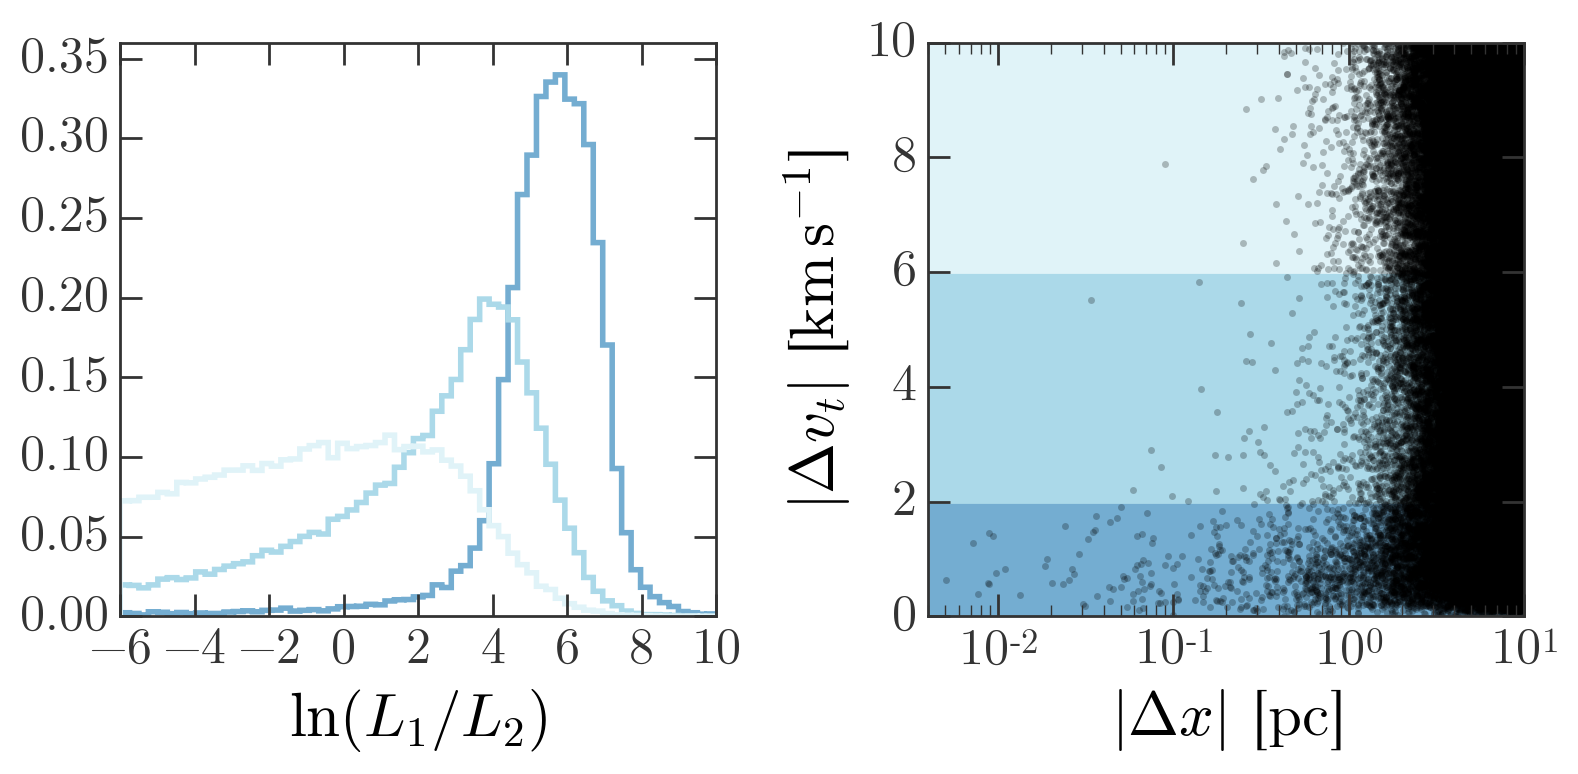

In [66]:
fig,axes = plt.subplots(1,2,figsize=(8,4))

# axes[0].hist(ln_L1 - ln_L2, bins=np.linspace(-6, 10, 64), histtype='step', normed=True, linewidth=2);
axes[1].plot(tbl['sep'], tbl['delta_v'], color='k', linestyle='none', marker='.', alpha=0.25, zorder=-10)

axes[0].set_xlim(-6,10)
axes[0].set_ylim(0, 0.36)

axes[1].set_xlim(4E-3, 1E1)
axes[1].set_ylim(0, 10)
axes[1].set_xscale('log')

# for i,(l,r) in enumerate(llr_cuts):
#     axes[0].fill_betweenx([0,1.], l, r, color=llr_colors[i], zorder=-100)

for i,(l,r) in enumerate(v_cuts):
    axes[1].fill_between([0,10.], l, r, color=v_colors[i], zorder=-100)

for i in range(3):
    idx = (tbl['delta_v'] > v_cuts[i][0]) & (tbl['delta_v'] < v_cuts[i][1])
    axes[0].hist((ln_L1 - ln_L2)[idx], bins=np.linspace(-6, 10, 64), 
                 histtype='step', normed=True, color=v_colors[i], linewidth=2);
    
#     idx = ((ln_L1 - ln_L2) > llr_cuts[i][0]) & ((ln_L1 - ln_L2) < llr_cuts[i][1])
#     axes[1].plot(tbl['sep'][idx], tbl['delta_v'][idx], color=llr_colors[i], 
#                  linestyle='none', marker='.', alpha=0.25, markeredgecolor='none', markeredgewidth=0)
    
axes[0].set_xlabel(r"$\ln(L_1/L_2)$")
axes[1].set_xlabel(r'$|\Delta x|$ [pc]')
axes[1].set_ylabel(r'$|\Delta v_t|$ [${\rm km}\,{\rm s}^{-1}$]')

fig.tight_layout()